In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam

In [0]:
!pip install mlflow

In [0]:
import mlflow

### Model: Neural Network

In [0]:
X_train = pd.read_csv("/dbfs/FileStore/shared_uploads/agusbaffo@gmail.com/X_train_prpro.csv")
y_train = pd.read_csv("/dbfs/FileStore/shared_uploads/agusbaffo@gmail.com/y_train_prpro.csv")
X_test = pd.read_csv("/dbfs/FileStore/shared_uploads/agusbaffo@gmail.com/X_test_prpro.csv")
y_test = pd.read_csv("/dbfs/FileStore/shared_uploads/agusbaffo@gmail.com/y_test_prpro.csv")

In [0]:
mlflow.start_run(experiment_id = '1224067848736773')

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [0]:
#Adding an early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=10,  #Stop the model training if the validation accuracy doesnt increase in 10 Epochs
                   restore_best_weights=True)

In [0]:
NN_Classifier = model.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=100,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_test, y_test))

Epoch 1/100
104/104 - 2s - loss: 0.2925 - accuracy: 0.8797 - val_loss: 0.1889 - val_accuracy: 0.9217 - 2s/epoch - 22ms/step
Epoch 2/100
104/104 - 2s - loss: 0.1858 - accuracy: 0.9240 - val_loss: 0.1534 - val_accuracy: 0.9379 - 2s/epoch - 15ms/step
Epoch 3/100
104/104 - 2s - loss: 0.1597 - accuracy: 0.9350 - val_loss: 0.1430 - val_accuracy: 0.9418 - 2s/epoch - 15ms/step
Epoch 4/100
104/104 - 2s - loss: 0.1448 - accuracy: 0.9404 - val_loss: 0.1345 - val_accuracy: 0.9430 - 2s/epoch - 15ms/step
Epoch 5/100
104/104 - 2s - loss: 0.1374 - accuracy: 0.9436 - val_loss: 0.1255 - val_accuracy: 0.9473 - 2s/epoch - 15ms/step
Epoch 6/100
104/104 - 1s - loss: 0.1296 - accuracy: 0.9469 - val_loss: 0.1211 - val_accuracy: 0.9495 - 1s/epoch - 14ms/step
Epoch 7/100
104/104 - 2s - loss: 0.1241 - accuracy: 0.9485 - val_loss: 0.1162 - val_accuracy: 0.9521 - 2s/epoch - 14ms/step
Epoch 8/100
104/104 - 2s - loss: 0.1186 - accuracy: 0.9507 - val_loss: 0.1146 - val_accuracy: 0.9516 - 2s/epoch - 15ms/step
Epoch 9/100
104/104 - 2s - loss: 0.1167 - accuracy: 0.9514 - val_loss: 0.1123 - val_accuracy: 0.9540 - 2s/epoch - 15ms/step
Epoch 10/100
104/104 - 2s - loss: 0.1134 - accuracy: 0.9528 - val_loss: 0.1119 - val_accuracy: 0.9534 - 2s/epoch - 15ms/step
Epoch 11/100
104/104 - 2s - loss: 0.1111 - accuracy: 0.9533 - val_loss: 0.1096 - val_accuracy: 0.9545 - 2s/epoch - 15ms/step
Epoch 12/100
104/104 - 2s - loss: 0.1093 - accuracy: 0.9538 - val_loss: 0.1103 - val_accuracy: 0.9533 - 2s/epoch - 15ms/step
Epoch 13/100
104/104 - 2s - loss: 0.1064 - accuracy: 0.9550 - val_loss: 0.1088 - val_accuracy: 0.9555 - 2s/epoch - 15ms/step
Epoch 14/100
104/104 - 1s - loss: 0.1051 - accuracy: 0.9552 - val_loss: 0.1085 - val_accuracy: 0.9551 - 1s/epoch - 14ms/step
Epoch 15/100
104/104 - 2s - loss: 0.1036 - accuracy: 0.9561 - val_loss: 0.1094 - val_accuracy: 0.9547 - 2s/epoch - 15ms/step
Epoch 16/100
104/104 - 2s - loss: 0.1010 - accuracy: 0.9568 - val_loss: 0.1072 - val_accuracy: 0.9550 - 2s/epoch - 15ms/step
Epoch 17/100
104/104 - 2s - loss: 0.1006 - accuracy: 0.9568 - val_loss: 0.1081 - val_accuracy: 0.9557 - 2s/epoch - 15ms/step
Epoch 18/100
104/104 - 2s - loss: 0.0999 - accuracy: 0.9574 - val_loss: 0.1054 - val_accuracy: 0.9555 - 2s/epoch - 16ms/step
Epoch 19/100
104/104 - 2s - loss: 0.0986 - accuracy: 0.9580 - val_loss: 0.1055 - val_accuracy: 0.9567 - 2s/epoch - 15ms/step
Epoch 20/100
104/104 - 2s - loss: 0.0978 - accuracy: 0.9580 - val_loss: 0.1053 - val_accuracy: 0.9557 - 2s/epoch - 15ms/step
Epoch 21/100
104/104 - 2s - loss: 0.0975 - accuracy: 0.9581 - val_loss: 0.1036 - val_accuracy: 0.9560 - 2s/epoch - 15ms/step
Epoch 22/100
104/104 - 2s - loss: 0.0951 - accuracy: 0.9592 - val_loss: 0.1087 - val_accuracy: 0.9547 - 2s/epoch - 15ms/step
Epoch 23/100
104/104 - 2s - loss: 0.0944 - accuracy: 0.9590 - val_loss: 0.1071 - val_accuracy: 0.9550 - 2s/epoch - 15ms/step
Epoch 24/100
104/104 - 2s - loss: 0.0936 - accuracy: 0.9594 - val_loss: 0.1065 - val_accuracy: 0.9550 - 2s/epoch - 15ms/step
Epoch 25/100
104/104 - 2s - loss: 0.0926 - accuracy: 0.9603 - val_loss: 0.1061 - val_accuracy: 0.9554 - 2s/epoch - 16ms/step
Epoch 26/100
104/104 - 2s - loss: 0.0929 - accuracy: 0.9598 - val_loss: 0.1071 - val_accuracy: 0.9558 - 2s/epoch - 15ms/step
Epoch 27/100
104/104 - 2s - loss: 0.0906 - accuracy: 0.9608 - val_loss: 0.1068 - val_accuracy: 0.9551 - 2s/epoch - 15ms/step
Epoch 28/100
104/104 - 2s - loss: 0.0896 - accuracy: 0.9608 - val_loss: 0.1066 - val_accuracy: 0.9569 - 2s/epoch - 15ms/step
Epoch 29/100
104/104 - 2s - loss: 0.0904 - accuracy: 0.9605 - val_loss: 0.1060 - val_accuracy: 0.9571 - 2s/epoch - 15ms/step
Epoch 30/100
104/104 - 2s - loss: 0.0890 - accuracy: 0.9612 - val_loss: 0.1060 - val_accuracy: 0.9572 - 2s/epoch - 16ms/step
Epoch 31/100
104/104 - 2s - loss: 0.0880 - accuracy: 0.9615 - val_loss: 0.1065 - val_accuracy: 0.9574 - 2s/epoch - 16ms/step
Epoch 32/100
104/104 - 2s - loss: 0.0882 - accuracy: 0.9615 - val_loss: 0.1098 - val_accuracy: 0.9567 - 2s/epoch - 15ms/step
Epoch 33/

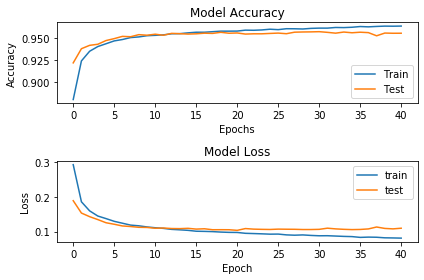

In [0]:
#Plotting Neural Network Training and validation
%matplotlib inline
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier.history['accuracy'])
plt.plot(NN_Classifier.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier.history['loss'])
plt.plot(NN_Classifier.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [0]:
mlflow.sklearn.log_model(model,"model")
mlflow.set_tag("Owner","abaffo")
mlflow.set_tag("Model Description","Neural Network Sequential")
mlflow.log_metric("accuracy",NN_Classifier.history['accuracy'][-1])

INFO:tensorflow:Assets written to: ram://ee4579d1-7621-4d76-b948-3220755bc685/assets

In [0]:
mlflow.end_run()